## Computer Vision

Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Use a confusion matrix and compute accuracy.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

In [1]:
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()

In [ ]:
X_train.shape
# X_train is 60000x28x28. 60,000 matrices of 28x28 size
X_test.shape
# X_test is 10000x28x28. 10,000 matrices of 28x28 size
X_train[i].shape
X_test[i].shape
# Both are 28x28, a specific instance of X_train and X_test

y_train.shape
# 60000 rows
y_test.shape
# 10000 rows

In [8]:
Z_train = pd.read_parquet('./data/Z_train.parquet')
Z_test = pd.read_parquet('./data/Z_test.parquet')

[4]


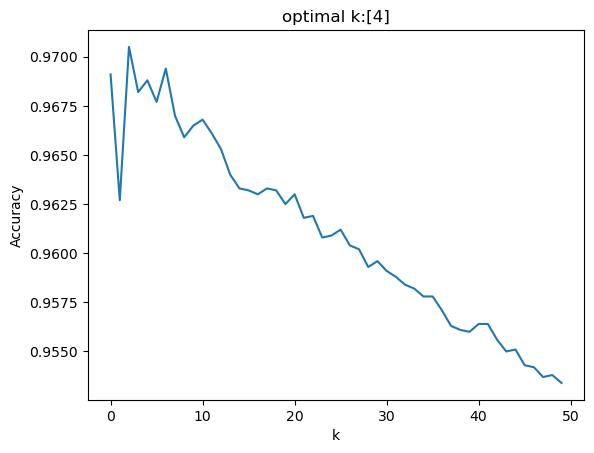

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Determine the optimal k:
k_bar = 50
k_grid = np.arange(2,k_bar) # The range of k's to consider
accuracy = np.zeros(k_bar) 

for k in range(k_bar):
    knn = KNeighborsClassifier(n_neighbors=k+1)
    predictor = knn.fit(Z_train.values,y_train) 
    y_hat = predictor.predict(Z_test.values) 
    accuracy[k] = knn.score(Z_test.values,y_test) # Bug in sklearn requires .values

accuracy_max = np.max(accuracy) # highest recorded accuracy
max_index = np.where(accuracy==accuracy_max) 
k_star = k_grid[max_index] # Find the optimal value of k
print(k_star)

plt.plot(np.arange(0,k_bar),accuracy) # Plot accuracy by k
plt.xlabel("k")
plt.title("optimal k:"+str(k_star))
plt.ylabel('Accuracy')
plt.show()

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)
predictor = knn.fit(Z_train.values,y_train) 
y_hat = predictor.predict(Z_test.values) 

accuracy = knn.score(Z_test.values,y_test) # Bug in sklearn requires .values
print('Accuracy: ', accuracy)

pd.crosstab(y_test, y_hat)

Accuracy:  0.9691


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,973,1,1,0,0,1,3,1,0,0
1,0,1129,3,0,1,1,1,0,0,0
2,7,6,992,5,1,0,2,16,3,0
3,0,1,2,970,1,19,0,7,7,3
4,0,7,0,0,944,0,3,5,1,22
5,1,1,0,12,2,860,5,1,6,4
6,4,2,0,0,3,5,944,0,0,0
7,0,14,6,2,4,0,0,992,0,10
8,6,1,3,14,5,13,3,4,920,5
